In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [11]:
import yfinance as yf

# Download Apple's historical stock data
df = yf.download("AAPL", start="2020-01-01", end="2025-01-01")

# Display first few rows
print(df.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716080  72.776606  71.466820  71.721026  135480400
2020-01-03  72.009125  72.771752  71.783969  71.941336  146322800
2020-01-06  72.582893  72.621631  70.876060  71.127851  118387200
2020-01-07  72.241547  72.849224  72.021231  72.592594  108872000
2020-01-08  73.403656  73.706287  71.943766  71.943766  132079200


In [13]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [24]:
X = df['Close'].reset_index()

In [25]:
t = X.drop(columns=['Date'],axis=1)

In [26]:
t

Ticker,AAPL
0,72.716080
1,72.009125
2,72.582893
3,72.241547
4,73.403656
...,...
1253,257.916443
1254,258.735504
1255,255.309296
1256,251.923019


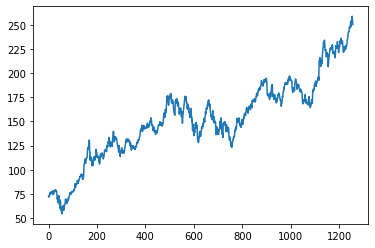

In [28]:
import matplotlib.pyplot as plt
plt.plot(t)

In [29]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(t).reshape(-1,1))

In [31]:
df1.shape

(1258, 1)

Spliting the data into train and test split (Timeseries data)

In [32]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:],

In [33]:
def create_dataset(dataset,time_step =1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)


In [34]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [35]:
print(X_test.shape),print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [36]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [38]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [39]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer ='adam')


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 159ms/step - loss: 0.0445 - val_loss: 0.0424
Epoch 2/100
12/12 [==============================] - 1s 89ms/step - loss: 0.0063 - val_loss: 0.0047
Epoch 3/100
12/12 [==============================] - 1s 91ms/step - loss: 0.0030 - val_loss: 0.0279
Epoch 4/100
12/12 [==============================] - 1s 96ms/step - loss: 0.0021 - val_loss: 0.0119
Epoch 5/100
12/12 [==============================] - 1s 93ms/step - loss: 0.0018 - val_loss: 0.0091
Epoch 6/100
12/12 [==============================] - 1s 90ms/step - loss: 0.0015 - val_loss: 0.0075
Epoch 7/100
12/12 [==============================] - 1s 101ms/step - loss: 0.0013 - val_loss: 0.0074
Epoch 8/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 9/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 10/100
12/12 [==============================] - 1s 93ms/step - loss: 0.0012 - val_loss: 0.00

In [42]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 19ms/step


In [43]:
train_predict  = scaler.inverse_transform(train_predict)
test_predict  = scaler.inverse_transform(test_predict)

In [44]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.21287112492132

In [45]:
math.sqrt(mean_squared_error(y_test,test_predict))

201.9213597049129